In [1]:
#chargement des différentes librairies 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ttest_ind
from scipy.stats import t

In [2]:
pip install researchpy

Note: you may need to restart the kernel to use updated packages.


In [3]:
df_customers = pd.read_csv('customers.csv') #chargement du fichier "customers"
df_customers #affichage des données contenues du fichier

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943
...,...,...,...
8618,c_7920,m,1956
8619,c_7403,f,1970
8620,c_5119,m,1974
8621,c_5643,f,1968


In [4]:
df_products = pd.read_csv('products.csv') #chargement du fichier "products"
df_products #affichage des données contenues du fichier

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0
...,...,...,...
3282,2_23,115.99,2
3283,0_146,17.14,0
3284,0_802,11.22,0
3285,1_140,38.56,1


In [5]:
df_transactions = pd.read_csv('transactions.csv') #chargement du fichier "transactions"
df_transactions #affichage des données contenues du fichier

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232
...,...,...,...,...
679527,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489
679528,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370
679529,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304
679530,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227


<font size='5'><font color='darkgreen'><b>1ère Partie : Nettoyage des données</b>

<font size='4'><b><u>Nettoyage de la table "customers":</b></u>

In [6]:
#Nombre de NaN présent dans le dataframe pour identifier les colonnes vides 
df_customers.isna().sum()

client_id    0
sex          0
birth        0
dtype: int64

On constate qu'il n'y a pas de valeurs NaN dans cette table 

In [7]:
#analyse de la table customers
df_customers.describe(include = 'all')

,client_id,sex,birth
count,8623,8623,8623.000000
unique,8623,2,NaN
top,c_4410,f,NaN
freq,1,4491,NaN
mean,NaN,NaN,1978.280877
std,NaN,NaN,16.919535
min,NaN,NaN,1929.000000
25%,NaN,NaN,1966.000000
50%,NaN,NaN,1979.000000
75%,NaN,NaN,1992.000000


On constate qu'il n'y a pas de doublons, il y a 8623 clients uniques basé sur le champ client_id
Il n'y a pas d'outliers non plus, les dates de naissance s'étendent de 1929 à 2004 ce qui semble tout à fait cohérent

<font size='4'><b><u>Nettoyage de la table "products":</b></u>

In [8]:
#Nombre de NaN présent dans le dataframe pour identifier les colonnes vides 
df_products.isna().sum()

id_prod    0
price      0
categ      0
dtype: int64

On constate qu'il n'y a pas de valeurs NaN dans cette table non plus 

In [9]:
#analyse de la table products
df_products.describe(include = 'all')

,id_prod,price,categ
count,3287,3287.000000,3287.000000
unique,3287,NaN,NaN
top,0_1421,NaN,NaN
freq,1,NaN,NaN
mean,NaN,21.856641,0.370246
std,NaN,29.847908,0.615387
min,NaN,-1.000000,0.000000
25%,NaN,6.990000,0.000000
50%,NaN,13.060000,0.000000
75%,NaN,22.990000,1.000000


On constate qu'il n'y a pas de doublons, il y a 3287 produits uniques basé sur le champ id_prod
On s'aperçoit qu'il y a 1 outlier, le prix minimum est négatif "-1"

In [10]:
#identification de l'outlier:
df_products[df_products['price'] <= 0]

,id_prod,price,categ
731,T_0,-1.0,0


Il s'agit du produit T_0 qui a un prix négatif, il doit s'agir d'une erreur

<font size='4'><b><u>Nettoyage de la table "transactions":</b></u>

In [11]:
#Nombre de NaN présent dans le dataframe pour identifier les colonnes vides 
df_transactions.isna().sum()

id_prod       0
date          0
session_id    0
client_id     0
dtype: int64

On constate qu'il n'y a pas de valeurs NaN dans la table transactions non plus

In [12]:
#analyse de la table transactions
df_transactions.describe(include = 'all')

,id_prod,date,session_id,client_id
count,679532,679532,679532,679532
unique,3267,679371,342316,8602
top,1_369,test_2021-03-01 02:30:02.237413,s_0,c_1609
freq,2252,13,200,25488


On remarque que des dates sont identifiées comme "test"

In [13]:
#affichage des types pour convertir la colonne "date" en format  date 
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679532 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679532 non-null  object
 1   date        679532 non-null  object
 2   session_id  679532 non-null  object
 3   client_id   679532 non-null  object
dtypes: object(4)
memory usage: 20.7+ MB


In [14]:
#conversion de la colonne "date" en type date et les valeurs en erreurs seront par défaut imputées en NaN
df_transactions['date'] = pd.to_datetime(df_transactions['date'], errors = 'coerce')
df_transactions['date']

0        2022-05-20 13:21:29.043970
1        2022-02-02 07:55:19.149409
2        2022-06-18 15:44:33.155329
3        2021-06-24 04:19:29.835891
4        2023-01-11 08:22:08.194479
                    ...            
679527   2022-01-15 13:05:06.246925
679528   2022-03-19 16:03:23.429229
679529   2022-12-20 04:33:37.584749
679530   2021-07-16 20:36:35.350579
679531   2022-09-28 01:12:01.973763
Name: date, Length: 679532, dtype: datetime64[ns]

In [15]:
#affichage des "test" qui ont été transformés en valeurs NaT:
df_transactions_test = df_transactions[pd.isnull(df_transactions['date']) == True]
df_transactions_test

,id_prod,date,session_id,client_id
3019,T_0,NaT,s_0,ct_0
5138,T_0,NaT,s_0,ct_0
9668,T_0,NaT,s_0,ct_1
10728,T_0,NaT,s_0,ct_0
15292,T_0,NaT,s_0,ct_0
...,...,...,...,...
657830,T_0,NaT,s_0,ct_0
662081,T_0,NaT,s_0,ct_1
670680,T_0,NaT,s_0,ct_1
671647,T_0,NaT,s_0,ct_1


On s'aperçoit que tous ces test ont pour id_prod T_0 soit la valeur aberrante relevée plus haut avec le prix négatif -1, il s'agit donc de 200 lignes de test que nous allons supprimer afin de ne pas biaiser notre analyse par la suite 

Nous allons donc supprimer :
- tous les id_prod = T_0
- tous les clients_id = ct_1 ou ct_0
- toutes les lignes en date NaT

In [16]:
df_customers.drop(df_customers[(df_customers['client_id'] == 'ct_0') | (df_customers['client_id'] == 'ct_1')].index, inplace = True)
df_products.drop(df_products[df_products['id_prod'] == 'T_0'].index, inplace = True)
df_transactions.drop(df_transactions[pd.isnull(df_transactions['date']) == True].index, inplace = True)

In [17]:
#séparation de la colonne "date" en jour, mois et année
df_transactions['date_jour'] = df_transactions['date'].dt.day
df_transactions['date_mois'] = df_transactions['date'].dt.month
df_transactions['date_annee'] = df_transactions['date'].dt.year

In [18]:
df_transactions

,id_prod,date,session_id,client_id,date_jour,date_mois,date_annee
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,20,5,2022
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,2,2,2022
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,18,6,2022
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,24,6,2021
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,11,1,2023
...,...,...,...,...,...,...,...
679527,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489,15,1,2022
679528,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370,19,3,2022
679529,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304,20,12,2022
679530,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227,16,7,2021


### <font size='5' color='green'>Création du jeu de données finales </font>

In [19]:
fusion_transac_prod = df_transactions.merge(df_products, on='id_prod', how='left')
df_final=fusion_transac_prod.merge(df_customers, on='client_id', how='left')
df_final

,id_prod,date,session_id,client_id,date_jour,date_mois,date_annee,price,categ,sex,birth
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,20,5,2022,4.18,0.0,f,1986
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,2,2,2022,15.99,1.0,m,1988
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,18,6,2022,7.99,0.0,f,1968
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,24,6,2021,69.99,2.0,m,2000
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,11,1,2023,4.99,0.0,m,1980
...,...,...,...,...,...,...,...,...,...,...,...
679327,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489,15,1,2022,12.99,0.0,f,1951
679328,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370,19,3,2022,10.99,1.0,f,1977
679329,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304,20,12,2022,12.99,0.0,f,1988
679330,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227,16,7,2021,4.98,0.0,m,1986


In [20]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679332 entries, 0 to 679331
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679332 non-null  object        
 1   date        679332 non-null  datetime64[ns]
 2   session_id  679332 non-null  object        
 3   client_id   679332 non-null  object        
 4   date_jour   679332 non-null  int64         
 5   date_mois   679332 non-null  int64         
 6   date_annee  679332 non-null  int64         
 7   price       679111 non-null  float64       
 8   categ       679111 non-null  float64       
 9   sex         679332 non-null  object        
 10  birth       679332 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(4)
memory usage: 62.2+ MB


In [21]:
df_final.describe()

,date_jour,date_mois,date_annee,price,categ,birth
count,679332.000000,679332.000000,679332.000000,679111.000000,679111.000000,679332.000000
mean,15.763892,6.504354,2021.670503,17.454773,0.441953,1977.811139
std,8.803106,3.480716,0.617553,18.328998,0.595042,13.574553
min,1.000000,1.000000,2021.000000,0.620000,0.000000,1929.000000
25%,8.000000,3.000000,2021.000000,8.870000,0.000000,1970.000000
50%,16.000000,6.000000,2022.000000,13.990000,0.000000,1980.000000
75%,23.000000,9.000000,2022.000000,18.990000,1.000000,1987.000000
max,31.000000,12.000000,2023.000000,300.000000,2.000000,2004.000000


In [22]:
df_final.isna().sum()

id_prod         0
date            0
session_id      0
client_id       0
date_jour       0
date_mois       0
date_annee      0
price         221
categ         221
sex             0
birth           0
dtype: int64

In [23]:
#affichage des lignes "NaN qui n'ont pas de catégories ni de prix:
df_NaN = df_final[pd.isnull(df_final['categ']) == True]
df_NaN

,id_prod,date,session_id,client_id,date_jour,date_mois,date_annee,price,categ,sex,birth
2633,0_2245,2022-09-23 07:22:38.636773,s_272266,c_4746,23,9,2022,NaN,NaN,m,1940
10103,0_2245,2022-07-23 09:24:14.133889,s_242482,c_6713,23,7,2022,NaN,NaN,f,1963
11723,0_2245,2022-12-03 03:26:35.696673,s_306338,c_5108,3,12,2022,NaN,NaN,m,1978
15670,0_2245,2021-08-16 11:33:25.481411,s_76493,c_1391,16,8,2021,NaN,NaN,m,1991
16372,0_2245,2022-07-16 05:53:01.627491,s_239078,c_7954,16,7,2022,NaN,NaN,m,1973
...,...,...,...,...,...,...,...,...,...,...,...
669533,0_2245,2021-08-25 09:06:03.504061,s_80395,c_131,25,8,2021,NaN,NaN,m,1981
670484,0_2245,2022-03-06 19:59:19.462288,s_175311,c_4167,6,3,2022,NaN,NaN,f,1979
671088,0_2245,2022-05-16 11:35:20.319501,s_209381,c_4453,16,5,2022,NaN,NaN,m,1981
675480,0_2245,2022-02-11 09:05:43.952857,s_163405,c_1098,11,2,2022,NaN,NaN,m,1986


on constate que le produit 0_2245 n'a ni de prix ni de catégorie, afin de traiter ces 221 lignes, nous l'identifirons telle que la categorie = 0 au vue de sa nomenclature ("0_xxx") et intégrerons le prix moyen de la catégorie 0:


In [24]:
# Remplacement des donnees manquantes de la catégorie du produit 0_2245:
df_final['categ'] = np.where(df_final['id_prod'] == '0_2245',
                               0,
                               df_final['categ'])
df_final.isna().sum()

id_prod         0
date            0
session_id      0
client_id       0
date_jour       0
date_mois       0
date_annee      0
price         221
categ           0
sex             0
birth           0
dtype: int64

In [25]:
df_final['categ']=df_final['categ'].astype('int')
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679332 entries, 0 to 679331
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679332 non-null  object        
 1   date        679332 non-null  datetime64[ns]
 2   session_id  679332 non-null  object        
 3   client_id   679332 non-null  object        
 4   date_jour   679332 non-null  int64         
 5   date_mois   679332 non-null  int64         
 6   date_annee  679332 non-null  int64         
 7   price       679111 non-null  float64       
 8   categ       679332 non-null  int32         
 9   sex         679332 non-null  object        
 10  birth       679332 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(4), object(4)
memory usage: 59.6+ MB


In [26]:
df_final

,id_prod,date,session_id,client_id,date_jour,date_mois,date_annee,price,categ,sex,birth
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,20,5,2022,4.18,0,f,1986
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,2,2,2022,15.99,1,m,1988
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,18,6,2022,7.99,0,f,1968
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,24,6,2021,69.99,2,m,2000
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,11,1,2023,4.99,0,m,1980
...,...,...,...,...,...,...,...,...,...,...,...
679327,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489,15,1,2022,12.99,0,f,1951
679328,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370,19,3,2022,10.99,1,f,1977
679329,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304,20,12,2022,12.99,0,f,1988
679330,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227,16,7,2021,4.98,0,m,1986


In [27]:
#calcul de la moyenne de prix de la catégorie 0: 
moyenne_categ_0=df_final.loc[(df_final['categ']==0),'price'].mean()

In [28]:
# Remplacement des donnees manquantes du prix du produit 0_2245:

df_final['price'].fillna(value=moyenne_categ_0 , inplace=True)

df_final.isna().sum()

id_prod       0
date          0
session_id    0
client_id     0
date_jour     0
date_mois     0
date_annee    0
price         0
categ         0
sex           0
birth         0
dtype: int64

In [29]:
df_final

,id_prod,date,session_id,client_id,date_jour,date_mois,date_annee,price,categ,sex,birth
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,20,5,2022,4.18,0,f,1986
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,2,2,2022,15.99,1,m,1988
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,18,6,2022,7.99,0,f,1968
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,24,6,2021,69.99,2,m,2000
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,11,1,2023,4.99,0,m,1980
...,...,...,...,...,...,...,...,...,...,...,...
679327,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489,15,1,2022,12.99,0,f,1951
679328,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370,19,3,2022,10.99,1,f,1977
679329,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304,20,12,2022,12.99,0,f,1988
679330,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227,16,7,2021,4.98,0,m,1986


In [30]:
#ajout de variables pour notre analyse: 

# âge
df_final['age'] = 2022 - df_final['birth'] # Âge du client
df_final.sample()

# Tranches d'âge
df_final['classe_age'] = '18-30'
df_final['classe_age'].loc[df_final[df_final['age']>=30].index] = '30-40'
df_final['classe_age'].loc[df_final[df_final['age']>=40].index] = '40-50'
df_final['classe_age'].loc[df_final[df_final['age']>=50].index] = '50-60'
df_final['classe_age'].loc[df_final[df_final['age']>=60].index] = '60-70'
df_final['classe_age'].loc[df_final[df_final['age']>=70].index] = '70-80'
df_final['classe_age'].loc[df_final[df_final['age']>=80].index] = '80 et +'
df_final.sample()

df_final['date_fixe'] = df_final['date'].dt.date # Variable temporaire de date fixe (jour)

# Total ventes
df_final = df_final.merge(
    df_final.groupby('client_id').count()['date'].reset_index().rename(columns={'date': 'total_ventes'}),
    how='left', on='client_id')

# Ventes mensuelles
df_final['ventes_mensuelles'] = round(df_final['total_ventes'] / 11)
df_final.sample()

# Taille du panier moyen
df_final = df_final.merge(
    df_final.pivot_table(
        index=['client_id', 'date_fixe'], 
        values='price', 
        aggfunc='count').reset_index().pivot_table(
        index='client_id').reset_index().rename(
        columns={'price': 'taille_panier_moyen'}), 
    on='client_id', how='left')

# Prix du panier moyen
df_final = df_final.merge(
    df_final.pivot_table(
        index=['client_id', 'date_fixe'], 
        values='price').reset_index().pivot_table(
        index='client_id').reset_index().rename(
        columns={'price': 'panier_moyen'}), 
    on='client_id', how='left').drop('date_fixe', axis=1)


df_final = df_final.merge(
    df_final.pivot_table(
    index='client_id', values='price', 
    aggfunc='sum').reset_index().rename(
    columns={'price': 'total_achats'}),
    on='client_id', how='left')
df_final.sample(3)

C:\Users\camille.amiel\AppData\Local\Temp\ipykernel_7956\2731385238.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['classe_age'].loc[df_final[df_final['age']>=30].index] = '30-40'
C:\Users\camille.amiel\AppData\Local\Temp\ipykernel_7956\2731385238.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['classe_age'].loc[df_final[df_final['age']>=40].index] = '40-50'
C:\Users\camille.amiel\AppData\Local\Temp\ipykernel_7956\2731385238.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

,id_prod,date,session_id,client_id,date_jour,date_mois,date_annee,price,categ,sex,birth,age,classe_age,total_ventes,ventes_mensuelles,taille_panier_moyen,panier_moyen,total_achats
106185,1_286,2021-12-06 08:37:51.368328,s_130197,c_7111,6,12,2021,29.44,1,m,1968,54,50-60,97,9.0,1.732143,18.299582,1814.230000
486681,0_1734,2021-11-05 14:41:21.766112,s_115151,c_580,5,11,2021,15.33,0,m,1988,34,30-40,340,31.0,2.931034,12.810337,4323.262752
147246,0_1798,2021-10-13 07:41:42.536968,s_104071,c_3135,13,10,2021,17.34,0,f,1983,39,30-40,142,13.0,2.897959,13.837685,1975.940000


<font size='5'><font color='darkgreen'><b>2ème Partie : Analyse du chiffre d'affaires</b>

In [31]:
ca_annuel = df_final.pivot_table(index='client_id', values=['total_achats','ventes_mensuelles','taille_panier_moyen','total_ventes','panier_moyen']).sort_values(by='total_achats', ascending=False).reset_index()

ca_annuel.head(10)

,client_id,panier_moyen,taille_panier_moyen,total_achats,total_ventes,ventes_mensuelles
0,c_1609,12.698451,34.915068,324033.350000,25488,2317.0
1,c_4958,56.004691,7.165517,289760.340000,5195,472.0
2,c_6714,16.684393,13.031206,153662.749128,9187,835.0
3,c_3454,16.493235,9.278082,113669.844564,6773,616.0
4,c_3263,13.226564,2.985185,5276.870000,403,37.0
5,c_1570,14.795369,2.654676,5271.620000,369,34.0
6,c_2899,55.754703,1.640625,5214.050000,105,10.0
7,c_2140,12.595187,3.190476,5208.820000,402,37.0
8,c_7319,13.434349,2.708029,5155.770000,371,34.0
9,c_8026,13.678026,2.772059,5093.218188,377,34.0


In [32]:
#  Nombre de commandes par année et par mois
df_commandes_mois=df_final.groupby('date_annee')['date_mois'].value_counts(ascending=True).reset_index(name='count')

df_commandes_mois

,date_annee,date_mois,count
0,2021,10,21606
1,2021,7,24742
2,2021,8,25659
3,2021,6,26857
4,2021,5,28293
5,2021,11,28321
6,2021,4,28457
7,2021,3,28610
8,2021,12,32464
9,2021,9,33326


In [33]:
# CA par livre
chiffre_affaire = df_final.groupby('id_prod')['price'].sum().sort_values(ascending=False).reset_index()
chiffre_affaire

,id_prod,price
0,2_159,94893.50
1,2_135,69334.95
2,2_112,65407.76
3,2_102,60736.78
4,2_209,56971.86
...,...,...
3261,0_1601,1.99
3262,0_807,1.99
3263,0_1653,1.98
3264,0_1284,1.38


In [34]:
#chiffre d'affaire mensuel:
df_ca_mensuel = df_final[['date_annee', 'date_mois','session_id', 'price']].groupby(['date_annee', 'date_mois']).agg(['sum','nunique']).reset_index()
df_ca_mensuel['ca_mois'] = df_ca_mensuel['price']['sum']
df_ca_mensuel['cmdes_mois'] = df_ca_mensuel['session_id']['nunique']
df_ca_mensuel.drop(['session_id', 'price'], axis='columns', inplace=True)
df_ca_mensuel

C:\Users\camille.amiel\AppData\Local\Temp\ipykernel_7956\4283214883.py:5: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df_ca_mensuel.drop(['session_id', 'price'], axis='columns', inplace=True)


,date_annee,date_mois,ca_mois,cmdes_mois
,,,,
0,2021,3,482536.353692,14203
1,2021,4,476258.234633,13972
2,2021,5,493028.575504,14169
3,2021,6,484163.027316,13839
4,2021,7,482877.952752,13573
5,2021,8,482380.533692,13593
6,2021,9,507368.338257,14850
7,2021,10,320873.207316,11553
8,2021,11,516274.111881,14608


<AxesSubplot:title={'center':'Evolution du CA'}, xlabel='date'>

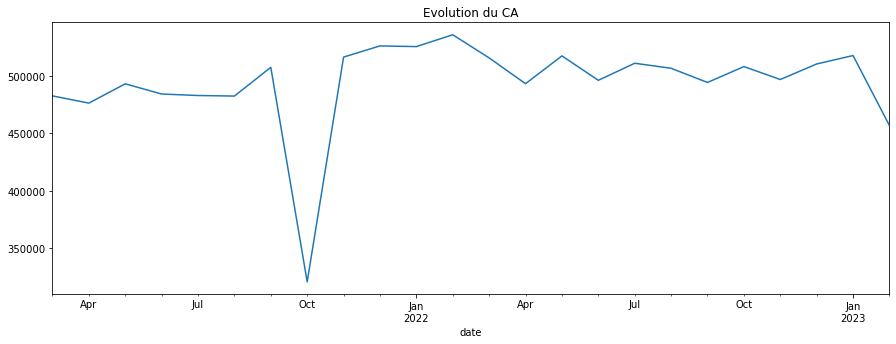

In [36]:
plt.figure(figsize=(15,5))
plt.title('Evolution du CA')
df_evolution=df_final.set_index('date')['price'].resample('M').sum()
df_evolution.plot()



date
2021-03-31              NaN
2021-04-30              NaN
2021-05-31    483941.054610
2021-06-30    484483.279151
2021-07-31    486689.851858
2021-08-31    483140.504587
2021-09-30    490875.608234
2021-10-31    436874.026422
2021-11-30    448171.885818
2021-12-31    454379.688838
2022-01-31    522552.680046
2022-02-28    529024.149442
2022-03-31    525551.417026
2022-04-30    514803.314923
2022-05-31    508674.745237
2022-06-30    502180.424319
2022-07-31    508101.392194
2022-08-31    504517.913692
2022-09-30    503891.142485
2022-10-31    502928.933692
2022-11-30    499672.128547
2022-12-31    505029.813692
2023-01-31    508226.768838
2023-02-28    494884.191254
Freq: M, Name: price, dtype: float64


Text(0.5, 1.0, "Moyenne mobile du chiffre d'affaire")

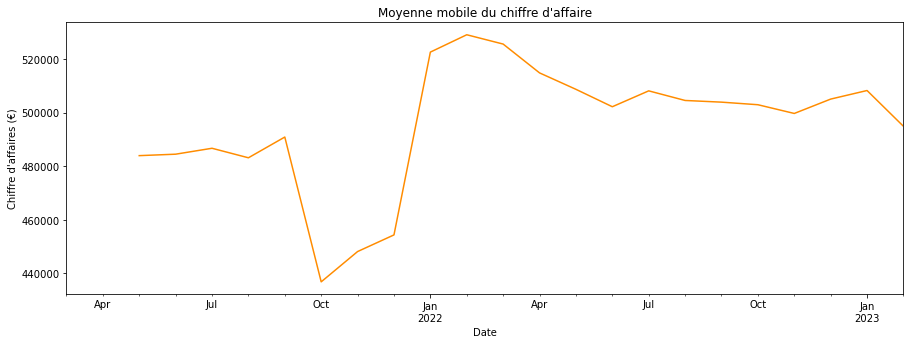

In [96]:
# Decomposition en moyenne mobile:
MovingAverage= df_evolution.rolling(3).mean()
print(MovingAverage)

# Graphique:
plt.figure(figsize = (15,5))
MovingAverage.plot(color='darkorange')
plt.xlabel("Date")
plt.ylabel("Chiffre d'affaires (€)")
plt.title("Moyenne mobile du chiffre d'affaire")

Graphique de l'évolution du CA et de la moyenne mobile compilé:

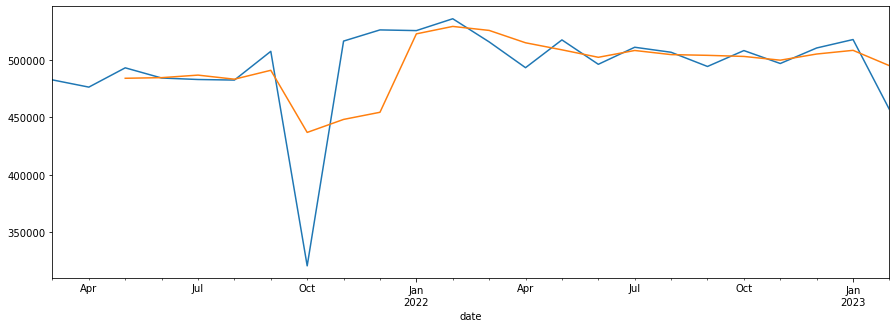

In [80]:
plt.figure(figsize=(15,5)),
df_evolution.plot()
MovingAverage.plot()
plt.show() 

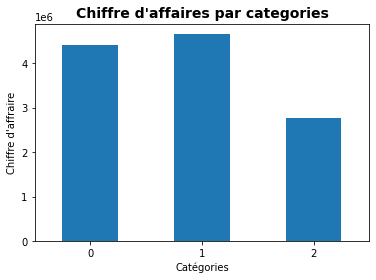

In [38]:
# le CA par catégories
df_final.groupby("categ")["price"].sum().plot(kind = "bar")
plt.title("Chiffre d'affaires par categories", fontsize = 14, fontweight="bold")
plt.xticks(rotation=0, ha="center")
plt.xlabel("Catégories")
plt.ylabel("Chiffre d'affraire")
plt.show()

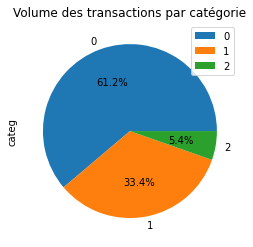

In [39]:
# Volume des ventes par catégorie
df_final['categ'].value_counts(normalize=True).plot(
    kind='pie',
    legend=True,
    autopct='%1.1f%%')
plt.title('Volume des transactions par catégorie')
plt.show()

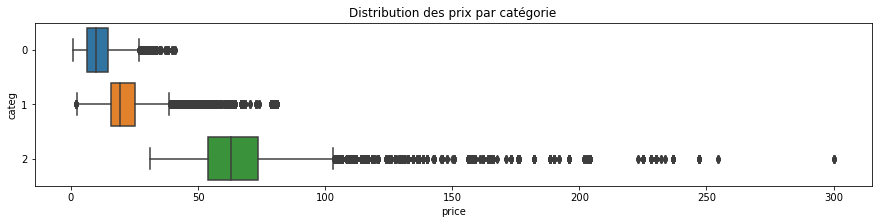

In [40]:
# Distribution et moyenne des prix par catégorie
plt.figure(figsize=(15,3))
sns.boxplot(data=df_final, y='categ', x='price', orient='h')
plt.title('Distribution des prix par catégorie')
plt.show()

On constate que les trois catégories correspondent à des tranches de prix ordonnées

<font size='5'><font color='darkgreen'><b>3ème Partie : Analyse de la clientèle</b>

In [41]:
#Top 10 meilleurs clients:
top10_client = df_final.groupby(['client_id', 'sex', 'birth'])['price'].sum().sort_values(ascending=False).reset_index()

print("Top 10 clients:")
top10_client.head(10)

Top 10 clients:


,client_id,sex,birth,price
0,c_1609,m,1980,324033.350000
1,c_4958,m,1999,289760.340000
2,c_6714,f,1968,153662.749128
3,c_3454,m,1969,113669.844564
4,c_3263,f,1985,5276.870000
5,c_1570,f,1979,5271.620000
6,c_2899,f,1994,5214.050000
7,c_2140,f,1977,5208.820000
8,c_7319,f,1974,5155.770000
9,c_8026,m,1978,5093.218188


on remarque que les 4 meilleurs clients se détachent du lot, nous pouvons les catégoriser comme des clients professionnels :

In [42]:
top4=top10_client.head(4)
top4

,client_id,sex,birth,price
0,c_1609,m,1980,324033.350000
1,c_4958,m,1999,289760.340000
2,c_6714,f,1968,153662.749128
3,c_3454,m,1969,113669.844564


In [43]:
# Création d'une catégorie 'Type' de client : particulier ou professionnel)
df_final['client_type'] = 'B2C'
df_final['client_type'].loc[df_final[df_final['client_id'].isin(top4['client_id'])].index] = 'B2B'

# Création de 2 df pour les distinguer
b2b = df_final[df_final['client_type']=='B2B']
b2c = df_final[df_final['client_type']=='B2C']

df_final.sample(10)

C:\Users\camille.amiel\AppData\Local\Temp\ipykernel_7956\332073424.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['client_type'].loc[df_final[df_final['client_id'].isin(top4['client_id'])].index] = 'B2B'


,id_prod,date,session_id,client_id,date_jour,date_mois,date_annee,price,categ,sex,birth,age,classe_age,total_ventes,ventes_mensuelles,taille_panier_moyen,panier_moyen,total_achats,client_type
503757,1_431,2022-12-14 20:34:26.634775,s_312096,c_1332,14,12,2022,27.99,1,m,1983,39,30-40,193,18.0,2.382716,13.571919,2493.200000,B2C
490041,1_378,2022-07-09 10:59:39.379213,s_235852,c_6404,9,7,2022,26.61,1,f,1965,57,50-60,131,12.0,1.364583,16.675469,2209.600000,B2C
605926,0_1985,2021-06-24 03:25:16.018657,s_52939,c_1314,24,6,2021,5.99,0,m,1973,49,40-50,179,16.0,2.452055,15.033219,2473.270000,B2C
481255,0_1102,2022-03-20 22:32:46.023252,s_182024,c_2262,20,3,2022,4.63,0,m,1976,46,40-50,94,9.0,3.241379,11.904517,1080.650000,B2C
228442,0_1501,2021-07-02 15:03:49.669208,s_56912,c_1609,2,7,2021,11.99,0,m,1980,42,40-50,25488,2317.0,34.915068,12.698451,324033.350000,B2B
165338,0_2301,2022-07-15 04:16:00.296578,s_238568,c_170,15,7,2022,4.99,0,f,1986,36,30-40,56,5.0,3.111111,12.732870,735.820000,B2C
497298,0_2086,2022-12-08 18:01:12.075840,s_309060,c_4773,8,12,2022,3.61,0,m,1975,47,40-50,95,9.0,2.375000,11.910683,1152.730000,B2C
628625,0_1580,2021-12-12 07:44:00.281776,s_133165,c_6714,12,12,2021,13.26,0,f,1968,54,50-60,9187,835.0,13.031206,16.684393,153662.749128,B2B
175291,0_1528,2022-06-10 05:07:53.346830,s_221475,c_1252,10,6,2022,11.38,0,m,1975,47,40-50,289,26.0,2.491379,12.211297,3594.620000,B2C
58567,2_39,2022-04-01 17:49:51.953004,s_187793,c_4119,1,4,2022,57.99,2,m,2004,18,18-30,20,2.0,1.538462,77.656154,1360.650000,B2C


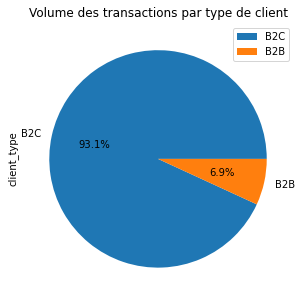

In [44]:
# Proportion du volume des transactions entre B2B et B2C
plt.figure(figsize=(5,5))
df_final['client_type'].value_counts(normalize=True).plot(
    kind='pie',
    legend=True,
    autopct='%1.1f%%')
plt.title('Volume des transactions par type de client')
plt.show()

On remarque que ces 4 clients de type professionnel représente à eux seuls environ 7% des transactions

sex
f    338402
m    340930
Name: client_id, dtype: int64


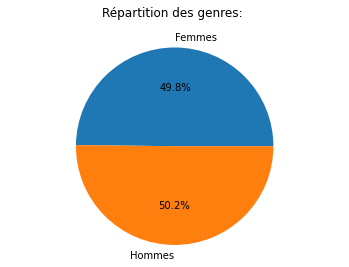

In [45]:
#Répartition des genres:
df_genre = df_final.groupby(["sex"])["client_id"].count()
print(df_genre)

#Graphique:
fig2, ax2 = plt.subplots()
ax2.pie(df_genre,
        labels=["Femmes","Hommes"],
        autopct="%1.1f%%")
ax2.axis("equal")
plt.title("Répartition des genres: \n")
plt.show()

La parité homme-femme est présente dans l'ensemble de la clientèle de la librairie

Total CA par genre:
 sex
f    5.860928e+06
m    5.995152e+06
Name: price, dtype: float64
Nombre de ventes par genre:
 sex
f    338402
m    340930
Name: price, dtype: int64
Moyenne des ventes par genre:
 sex
f    17.319424
m    17.584700
Name: price, dtype: float64


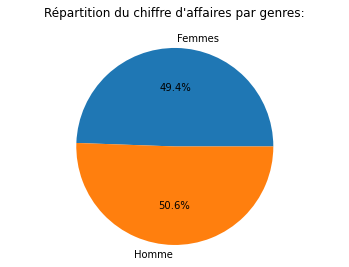

In [46]:
#Répartition du CA par genres:
df_ca_genre = df_final.groupby(["sex"])["price"].sum()
print("Total CA par genre:\n", df_ca_genre)

df_nbventes_genre = df_final.groupby(["sex"])["price"].count()
print("Nombre de ventes par genre:\n", df_nbventes_genre)

df_avgventes_genre = df_final.groupby(["sex"])["price"].mean()
print("Moyenne des ventes par genre:\n", df_avgventes_genre)


# Graphique:
fig3, ax3 = plt.subplots()
ax3.pie(df_ca_genre,
        labels=["Femmes","Homme"],
        autopct="%1.1f%%")
ax3.axis("equal")
plt.title("Répartition du chiffre d'affaires par genres:\n")
plt.show()

Et le chiffre d'affaires est réalisé par presque autant de femmes que d'hommes

La courbe de Lorenz permet de calculer l’indice de Gini. Ce coefficient est une mesure du degré d’inégalité.
L’indice de Gini correspond au rapport entre la surface hachurée et le triangle en dessous.
L’indice de Gini varie entre 0 et 1. Si l’indice est de 0, cela signifie que la courbe de Lorenz est la diagonale, l’égalité
est parfaite. Si l’indice est de 1, cela signifie qu’une seule personne détient tout le revenu, c’est l’inégalité maximale.
Plus les inégalités de revenus sont importantes, plus la courbe de Lorenz s’éloigne de la diagonale, plus l’indice de
Gini est élevé. 

Incide de Gini : 0.44639552269807026


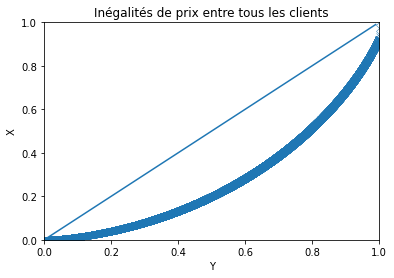

In [47]:
# Courbe de Lorenz
def lorenz(variable, title):
    X = variable.values
    X = np.sort(X)
    
    # Indice de Gini
    def gini(array):
        array
        sorted_array = array.copy()
        sorted_array.sort()
        n = array.size
        coef_ = 2. / n
        const_ = (n + 1.) / n
        weighted_sum = sum([(i+1)*yi for i, yi in enumerate(sorted_array)])
        return coef_*weighted_sum/(sorted_array.sum()) - const_
    print('Incide de Gini :', gini(X))
    
    # Courbe de Lorenz
    X_lorenz = X.cumsum() / X.sum()
    X_lorenz = np.insert(X_lorenz, 0, 0)
    # X_lorenz[0], X_lorenz[-1]
    y = np.arange(X_lorenz.size)/(X_lorenz.size-1)
    lorenz = pd.DataFrame()
    lorenz['X'] = pd.Series(X_lorenz)
    lorenz['Y'] = pd.Series(y)
    sns.scatterplot(data=lorenz, x='Y', y='X', marker='x')

    # Diagonale
    a = np.arange(0,1,.01)
    x = a
    y = a
    
    # Graphique
    sns.lineplot(x=x,y=y)
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.title(title)
    plt.show()
    
lorenz(ca_annuel['total_achats'], 'Inégalités de prix entre tous les clients')

L'indice de Gini est nettement plus faible si on exclut les 4 professionnels:

Incide de Gini : 0.40263087902112527


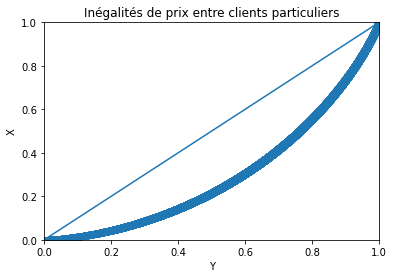

In [48]:
# Inégalité des chiffres d'affaires annuels des clients particuliers
lorenz(b2c.pivot_table(index='client_id')['total_achats'], 'Inégalités de prix entre clients particuliers')

L'indice de Gini est nettement plus faible si on exclut les 4 professionnels.

<font size='5'><font color='darkgreen'><b>4ème Partie : Analyse des clients professionnels</b>

Le volume des transactions par catégorie montre des habitudes différentes chez chacun de ces clients.

Le client c_1609 ne consomme pas du tout la catégorie 2, tandis que le client c_4858 est le seul à consommer principalement cette catégorie. Vu que ce client détient de loin le plus gros panier moyen, la catégorie pourrait influer sur le prix du livre.

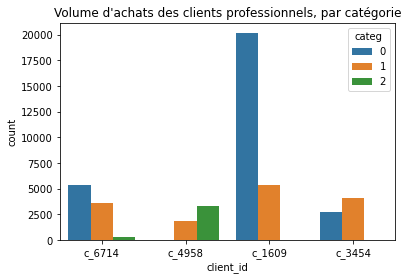

In [49]:
sns.countplot(data=b2b, x='client_id', hue='categ')
plt.title('Volume d\'achats des clients professionnels, par catégorie')
plt.show()

La distribution des prix d'achats confirme que le client c_4958 achète des livres bien plus chers les 3 autres clients:

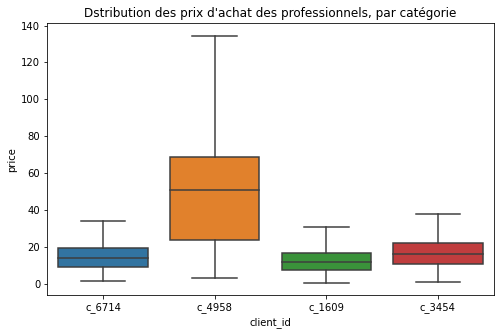

In [50]:
plt.figure(figsize=(8,5))
sns.boxplot(data=b2b, y='price', x='client_id', showfliers=False)
plt.title('Dstribution des prix d\'achat des professionnels, par catégorie')
plt.show()

Analysons la périodicité des achats en fonction des catégories de livres:<br>
 - la catégorie 0 est surtout achetée en septembre<br>
 - la catégorie 1 en décembre<br>
 - la catégorie 2 au mois de février

Client c_6714


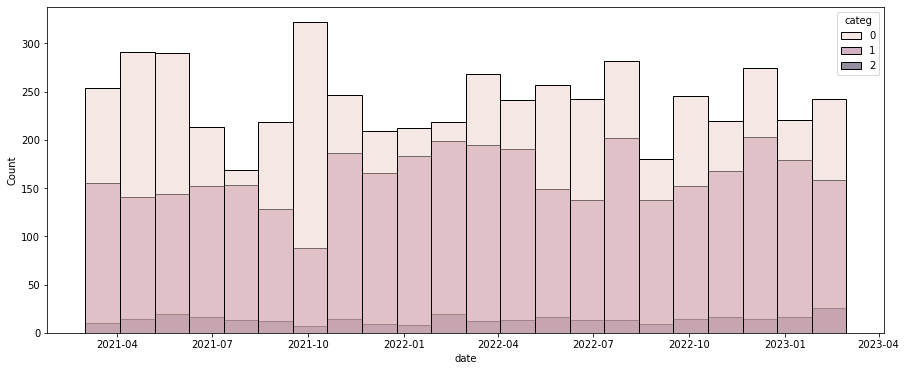

Client c_4958


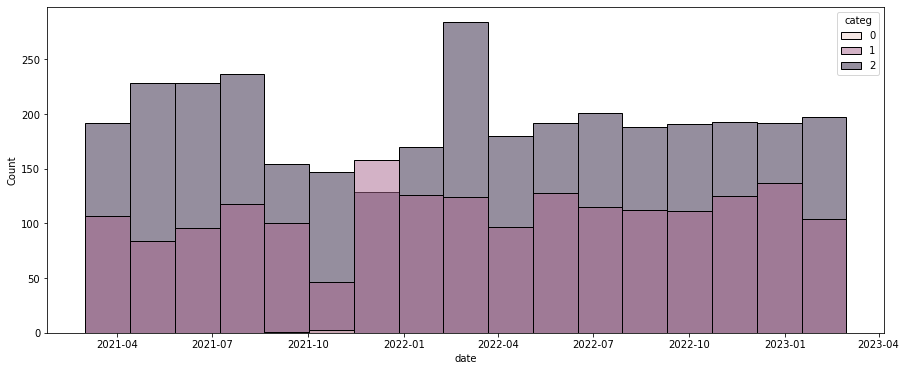

Client c_1609


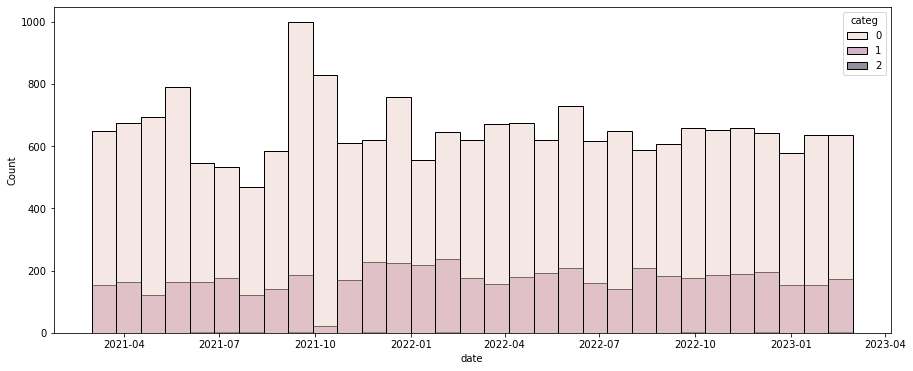

Client c_3454


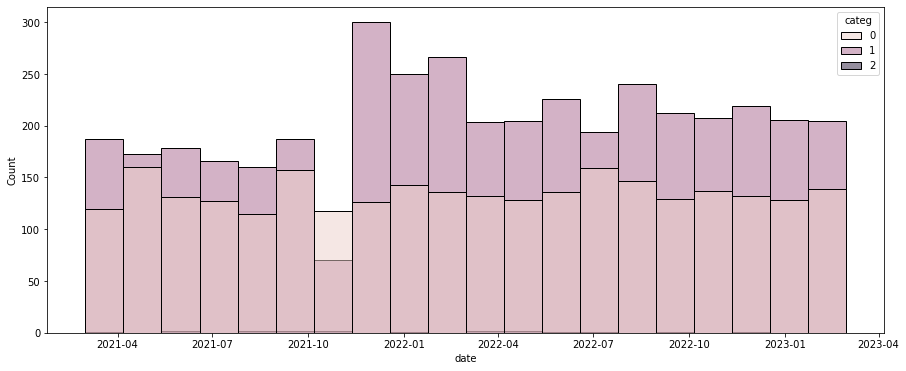

In [51]:
for i in b2b['client_id'].unique():
    print('Client', i)
    plt.figure(figsize=(15,6))
    sns.histplot(data=b2b[b2b['client_id']==i], x='date', hue='categ')
    plt.show()

<font size='5'><font color='darkgreen'><b>5ème Partie : Analyse des clients particuliers</b>

<font size=''><font color='green'><b>Analyse de la variable "sexe"</b>

La pyramide des âges ne montre aucune différence entre la clientèle femme et homme:

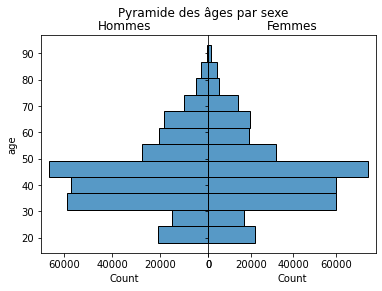

In [52]:
fig, axes = plt.subplots(1, 2)
fig.suptitle('Pyramide des âges par sexe')

sns.histplot(ax=axes[0], y=b2c[b2c['sex']=='m']['age'], bins=12)
axes[0].invert_xaxis()
axes[0].set_title('Hommes')

sns.histplot(ax=axes[1], y=b2c[b2c['sex']=='f']['age'], bins=12)
axes[1].set_yticklabels([])
axes[1].set_ylabel('')
axes[1].set_title('Femmes')

plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

La périodicité des ventes est similaire pour les femmes et les hommes:

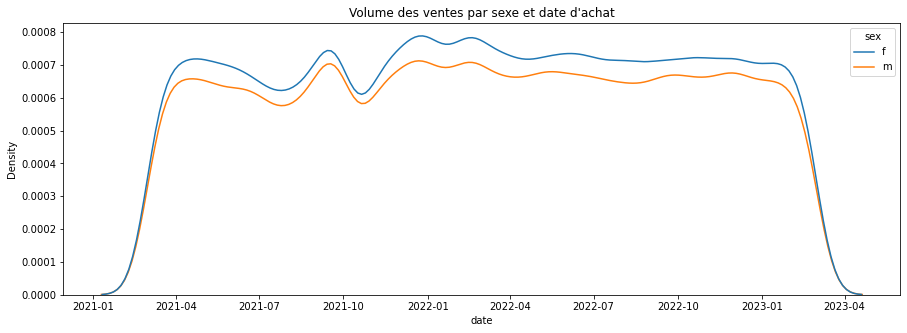

In [53]:
plt.figure(figsize=(15,5))
sns.kdeplot(data=b2c, x='date', hue='sex')
plt.title('Volume des ventes par sexe et date d\'achat')
plt.show()

Que ce soit une femme ou un homme, le type de catégorie achetée garde pratiquement les mêmes proportions:

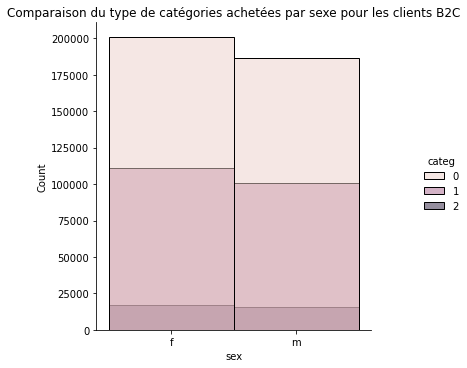

In [54]:
sns.displot(data=b2c, x='sex', hue='categ')
plt.title('Comparaison du type de catégories achetées par sexe pour les clients B2C')
plt.show()

La distribution des prix est également similaire : le sexe ne nous renseigne pas sur les habitudes des clients de la librairie

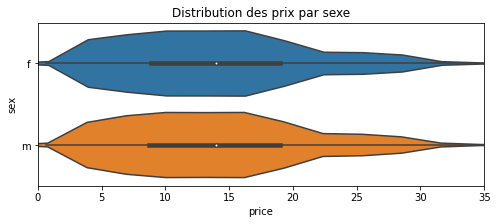

In [55]:
plt.figure(figsize=(8,3))
sns.violinplot(data=b2c, x='price', y='sex', showfliers=False, showmeans=True)
plt.xlim([0,35])
plt.title('Distribution des prix par sexe')
plt.show()

<font size=''><font color='black'><b>Test de corrélation:</b>

Une matrice de corrélations peut nous éclairer sur les variables entre lesquelles il peut exister des corrélations:

In [57]:
b2c_drop=b2c.drop(columns=['sex', 'date_jour','date_mois','date_annee', 'birth'])

C:\Users\camille.amiel\AppData\Local\Temp\ipykernel_7956\2494703062.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask=np.triu(np.ones_like(b2c_drop.corr(), dtype=np.bool)),


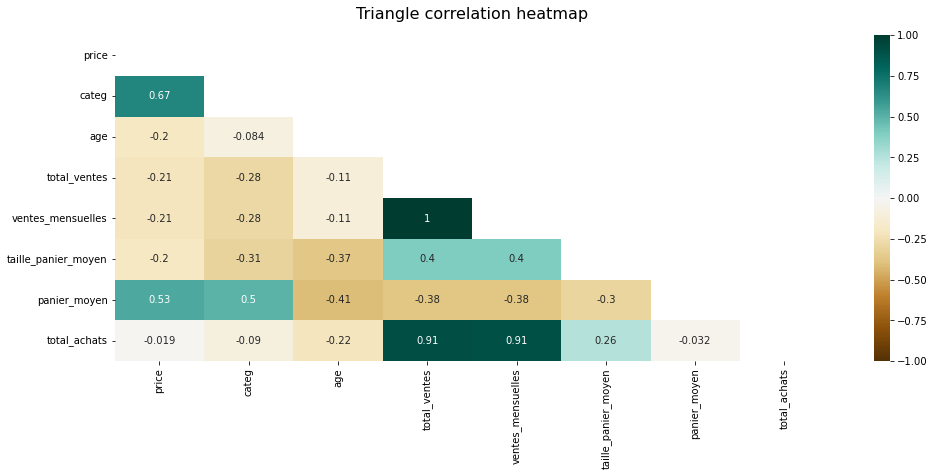

In [58]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(
    b2c_drop.corr(), 
    mask=np.triu(np.ones_like(b2c_drop.corr(), dtype=np.bool)), 
    vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle correlation heatmap', fontdict={'fontsize':16}, pad=16)
plt.show()

In [59]:
#on résalise un second test qui montrera ou non l'indépendance des deux variables catégorie et sexe:

<font size=''><font color='black'><b>Test d'indépendance du χ² :</b> 

La cardinalité est le nombre de modalités dans les 2 qualitatives à étudier. Plus la cardinalité est grande, plus il sera difficile de séparer distinctement les groupes.

On mesure cette cardinalité en degrés de liberté :

Degrés de liberté = ( nombre de modalités variable_A - 1 ) x ( nombre de modalités variable_B - 1 )

On obtient donc 2 degrés de liberté dans la table de contingence entre 'categ' et 'sex'.

In [60]:
# Table de contingence
crosstab = pd.crosstab(b2c['categ'], b2c['sex'], margins=False)
print('Table de contingence :')
print(crosstab)

import researchpy as rp

# Table de contingence normalisée
table, results = rp.crosstab(b2c['categ'], b2c['sex'], prop='col', test='chi-square')
print('\n' + '-' * 55, '\n\nTable de contingence normalisée :')
print(table)

Table de contingence :
sex         f       m
categ                
0      200904  186589
1      111331  101017
2       16980   15868

------------------------------------------------------- 

Table de contingence normalisée :
          sex                
sex         f       m     All
categ                        
0       61.03   61.48   61.25
1       33.82   33.29   33.56
2        5.16    5.23    5.19
All    100.00  100.00  100.00


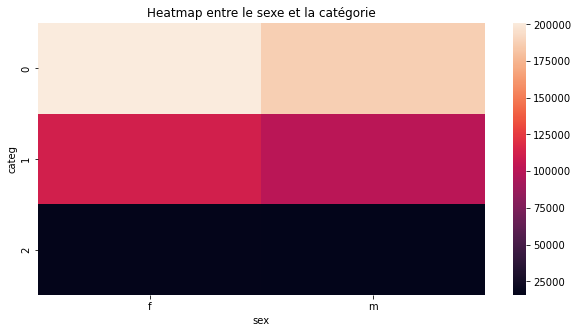

In [61]:
plt.figure(figsize=(10,5))
sns.heatmap(crosstab)
plt.title('Heatmap entre le sexe et la catégorie')
plt.show()

Le test de normalité ne fait pas partie des conditions du χ² , vu qu'on ne mesure pas la normalité que sur des variables quantitatives.

On doit malgré tout valider 2 conditions :

au moins 1 valeur dans chaque cellule de la table de contingence au moins 80% des valeurs égales ou supérieures à 5

In [62]:
# Test de χ² 
df_sample = b2c.sample(1500)
table = pd.crosstab(df_sample['categ'], df_sample['sex'], margins=False)
stat, p, dof, expected = stats.chi2_contingency(table)
print('Test de χ²')
print('Stat = %.3f\np-value = %.35f' % (stat, p))
if p > .05:
    print('H0: the two samples are independent')
else:
    print('H1: there is a dependency between the samples.')
print('\nConditions :\n'
      '- Observations used in the calculation of the contingency table are independent.',
      '\n- 25 or more examples in each cell of the contingency table.')

Test de χ²
Stat = 1.631
p-value = 0.44241858939861489208311695620068349
H0: the two samples are independent

Conditions :
- Observations used in the calculation of the contingency table are independent. 
- 25 or more examples in each cell of the contingency table.


Ici le test nous permet d'obtenir un résultat de 95% soit de confirmer qu'il n'y a pas de dépendances entre ces 2 variables sexe et catégorie.

<font size=''><font color='green'><b>Analyse de la variable "âge"</b>

La clientèle principale se situe entre 30 et 50 ans:

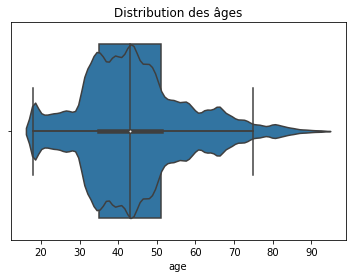

In [63]:
sns.boxplot(data=b2c, x='age', showfliers=False)
sns.violinplot(data=b2c, x='age', showfliers=False)
plt.title('Distribution des âges')
plt.show()

Les 3 catégories sont consommées par toutes les classes d'âge.  
On remarque que les acheteurs de la catégorie 0 sont principalement ces 30-50 ans, tandis que la catégorie 2 est consommée avant tout par les moins de 30 ans:

<Figure size 576x360 with 0 Axes>

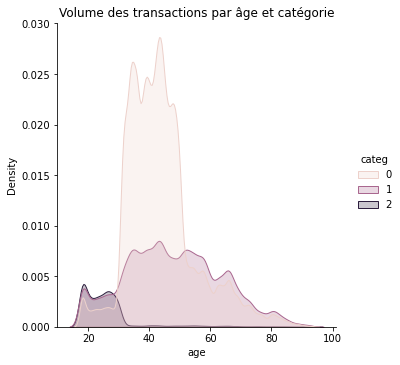

In [64]:
plt.figure(figsize=(8,5))
sns.displot(data=b2c, x='age', hue='categ', kind='kde', fill=True)
plt.title('Volume des transactions par âge et catégorie')
plt.show()

Comme c'était le cas avec le client professionnel c_4958 né en 1999, les moins de 30 ans affichent des prix d'achat bien plus élevés que les autres clients.
Les prix sont légèrement inférieurs chez les 30-50 ans (population consommant la catégorie 0 comme vu précédemment):

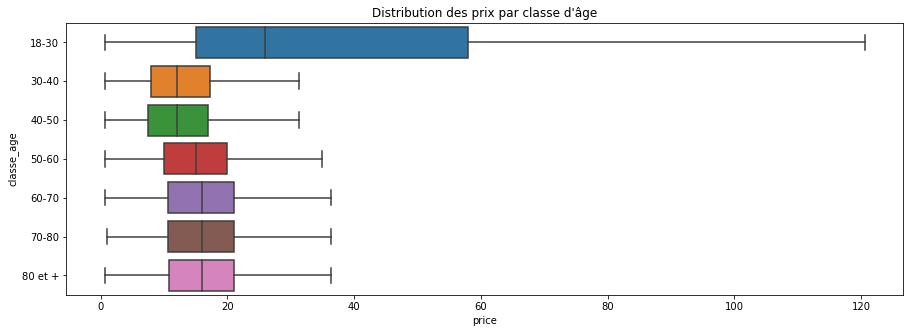

In [65]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=df_final.sort_values(by='classe_age'), y='classe_age', x='price', showfliers=False)
plt.title('Distribution des prix par classe d\'âge')
plt.show()

Le chiffre d'affaires annuel des clients particuliers est logiquement corrélé à la classe d'âge, car comme vu plus tôt :

la catégorie 0 est la catégorie la plus achetée par les 30-50 ans
la catégorie 2 est presque exclusivement achetée par les moins de 30 ans

Les 30-50 ans concentrent ainsi les plus gros chiffres d'affaires, suivis par les moins de 30 ans:

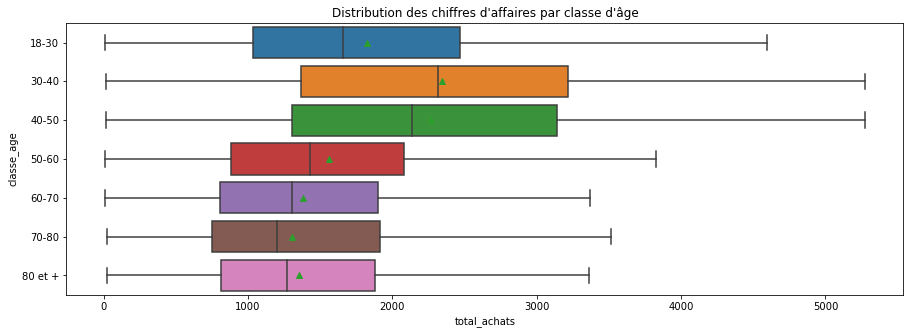

In [66]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=b2c.sort_values(by='classe_age'), y='classe_age', x='total_achats', showfliers=False, showmeans=True)
plt.title('Distribution des chiffres d\'affaires par classe d\'âge')
plt.show()

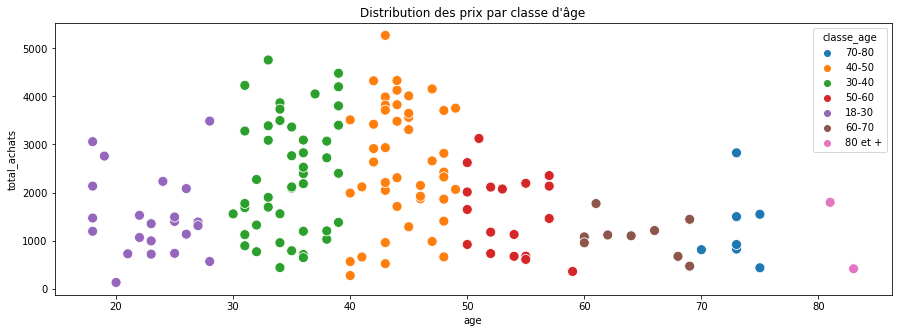

In [67]:
plt.figure(figsize=(15, 5))
sns.scatterplot(data=b2c.sample(150), x='age', y='total_achats', hue='classe_age', s=100)
plt.title('Distribution des prix par classe d\'âge')
plt.show()

La fréquence d'achat par mois se répartie de la façon suivante:

les moins de 30 ans achètent le même nombre de livres (jamais plus de 3 livres par mois)
Un quart des 30-50 ans achète plus de 8 livres par mois
les plus de 50 ans ont des habitudes plus variées, mais achètent rarement plus de 5 livres

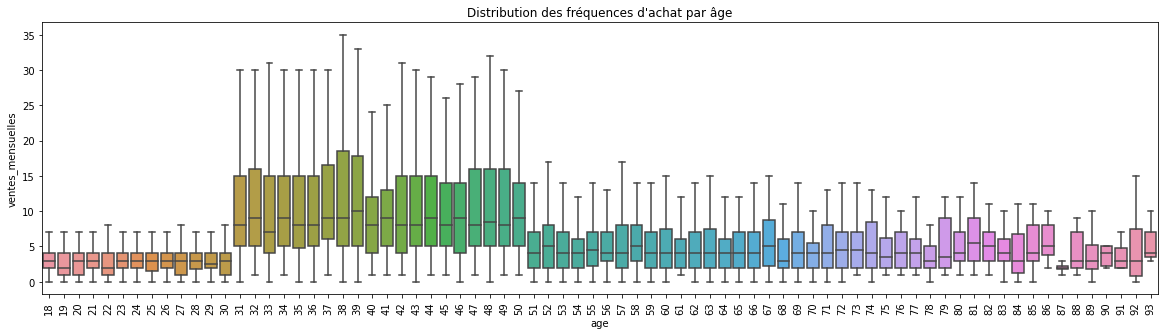

In [68]:
plt.figure(figsize=(20,5))
sns.boxplot(data=b2c.pivot_table(index=['client_id']), y='ventes_mensuelles', x='age', showfliers=False)
plt.xticks(rotation=90)
plt.title('Distribution des fréquences d\'achat par âge')
plt.show()

La taille du panier moyen suit la même logique que la fréquence d'achat par âge :

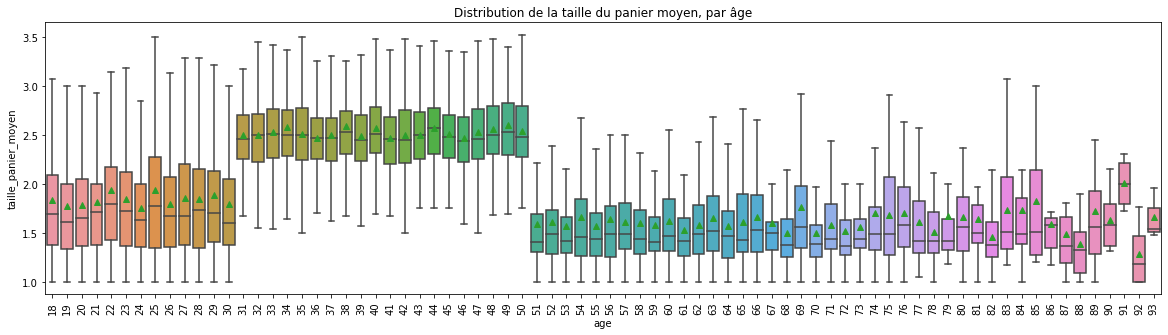

In [69]:
plt.figure(figsize=(20,5))
sns.boxplot(data=b2c.pivot_table(index=['client_id']),y='taille_panier_moyen', x='age', showfliers=False, showmeans=True)
plt.xticks(rotation=90)
plt.title('Distribution de la taille du panier moyen, par âge')
plt.show()

<font size=''><font color='black'><b>Test de Kruskal-Wallis :</b> 

In [70]:
df_tranche_prix=df_final[['classe_age','price']]
df_tranche_prix.head()

,classe_age,price
0,30-40,4.18
1,30-40,15.99
2,50-60,7.99
3,18-30,69.99
4,40-50,4.99


In [71]:
df_tranche_prix['classe_age'].unique()

array(['30-40', '50-60', '18-30', '40-50', '60-70', '70-80', '80 et +'],
      dtype=object)

In [72]:
#Listes des prix pour chaque classes d'âge:
classe_0=df_tranche_prix['price'].loc[df_tranche_prix['classe_age']=='18-30'].to_list()
classe_1=df_tranche_prix['price'].loc[df_tranche_prix['classe_age']=='30-40'].to_list()
classe_2=df_tranche_prix['price'].loc[df_tranche_prix['classe_age']=='40-50'].to_list()
classe_3=df_tranche_prix['price'].loc[df_tranche_prix['classe_age']=='50-60'].to_list()
classe_4=df_tranche_prix['price'].loc[df_tranche_prix['classe_age']=='60-70'].to_list()
classe_5=df_tranche_prix['price'].loc[df_tranche_prix['classe_age']=='70-80'].to_list()
classe_6=df_tranche_prix['price'].loc[df_tranche_prix['classe_age']=='80 et +'].to_list()

Existe-t-il une corrélation entre le CA et la classe d'âge ? 

hypothèses:    
H0= il n'y a pas de relation significative    
H1= il y a une corrélation     
choix du test Kruskal-Wallis (ANOVA) variable quantitative x variables qualitatives (6 classes d'âges)

In [73]:
stats.kruskal(classe_0, classe_1, classe_2, classe_3, classe_4, classe_5, classe_6)

KruskalResult(statistic=75618.98630928832, pvalue=0.0)

p_value < alpha on rejette donc l'hypothèse H0, il existe donc bien une corrélation entre la classe d'âge et le prix

<font size=''><font color='black'><b>Test de Student :</b> 

In [74]:
#T Stat:
se_panier_moyen=df_sample.std()['panier_moyen']/np.sqrt(10)
se_age=df_sample.std()['age']/np.sqrt(10)
sed=np.sqrt((se_panier_moyen**2) + (se_age**2))
t_stat=(df_sample.mean()['panier_moyen'] - df_sample.mean()['age'])/sed
print(t_stat)

-4.928989100914486


C:\Users\camille.amiel\AppData\Local\Temp\ipykernel_7956\467000231.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  se_panier_moyen=df_sample.std()['panier_moyen']/np.sqrt(10)
C:\Users\camille.amiel\AppData\Local\Temp\ipykernel_7956\467000231.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  se_age=df_sample.std()['age']/np.sqrt(10)
C:\Users\camille.amiel\AppData\Local\Temp\ipykernel_7956\467000231.py:5: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  t_stat=(df_sample.mean()['panier_moyen'] - df_sample.mean()['age'])/sed
C:\Users\camille.amiel\AppDat

In [75]:
#Test de Student entre la variable âge et panier moyen
stat, p = stats.ttest_ind(df_sample['panier_moyen'], df_sample['age'])
print('Test de Student\n')
print(f't={t_stat}, p={p}')
if p > 0.05:
    print('H0: les moyennes des échantillons sont égales')
else:
    print('H1: une ou plus des moyennes des échantillons sont inégales')

Test de Student

t=-4.928989100914486, p=0.0
H1: une ou plus des moyennes des échantillons sont inégales


Le résultat du test Student prouve qu'il existe une corrélation importante entre l'âge des clients et leurs paniers moyens

<font size=''><font color='green'><b>Analyse de la variable "produit"</b>

Comme chez les clients B2B, la périodicité des ventes apparaît corrélée à la catégorie :

- la catégorie 0 à la rentrée scolaire 
- la catégorie 1 pendant les fêtes de Noël
- la catégorie 2 pendant l'été et au mois de février 

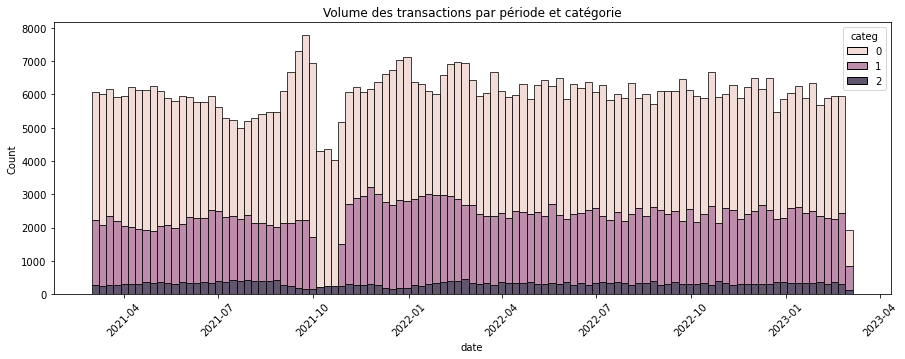

In [76]:
plt.figure(figsize=(15,5))
sns.histplot(data=b2c, x='date', hue='categ', multiple='stack', binwidth=7)
plt.xticks(rotation=45)
plt.title('Volume des transactions par période et catégorie')
plt.show()

Catégorie 0


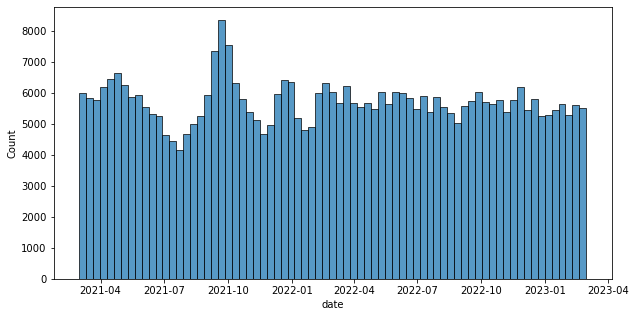

Catégorie 1


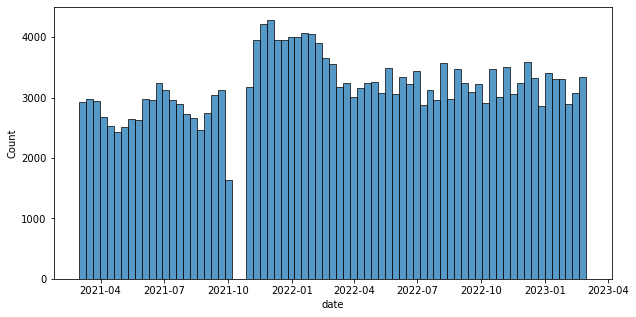

Catégorie 2


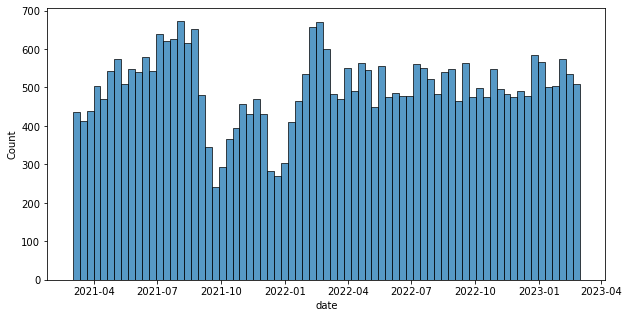

In [77]:
for i in sorted(df_final['categ'].unique()):
    plt.figure(figsize=(10,5))
    print('Catégorie', i)
    sns.histplot(data=df_final[df_final['categ']==i], x='date', binwidth=10)
    plt.show()

<font size=''><font color='black'><b>Test de Welch :</b> 

In [78]:
# Test de Welch entre catégorielle et quantitative
stat, p = stats.ttest_ind(df_sample['ventes_mensuelles'], df_sample['categ'])
print('Test de Welch\n')
print('p-value :', p, '\nstat :', stat)
if p > 0.05:
    print('H0: les moyennes des échantillons sont égales')
else:
    print('H1: une ou plus des moyennes des échantillons sont inégales')

Test de Welch

p-value : 0.0 
stat : 56.37394668400334
H1: une ou plus des moyennes des échantillons sont inégales


Le test de Welch valide ici la corrélation entre prix et le nombre de ventes mensuelles